In [1]:
import numpy as np
import pandas as pd
import os
import sqlite3

# Step One
I downloaded the History of Baseball database because I have always been interested in baseball. After seeing Abe's example I was intersted in exploring other parts of the database.

In [2]:
con = sqlite3.connect("database.sqlite")

db = pd.read_sql("PRAGMA database_list;", con)["name"][0]
db

'main'

In [3]:
baseball = pd.read_sql("SELECT * FROM {}.sqlite_master WHERE type='table';".format(db), con=con)

baseball

,type,name,tbl_name,rootpage,sql
0,table,all_star,all_star,2,"CREATE TABLE all_star (\n player_id TEXT,\n..."
1,table,appearances,appearances,217,"CREATE TABLE appearances (\n year INTEGER,\..."
2,table,manager_award,manager_award,5278,CREATE TABLE manager_award (\n player_id TE...
3,table,player_award,player_award,5288,CREATE TABLE player_award (\n player_id TEX...
4,table,manager_award_vote,manager_award_vote,5560,CREATE TABLE manager_award_vote (\n award_i...
5,table,player_award_vote,player_award_vote,5580,CREATE TABLE player_award_vote (\n award_id...
6,table,batting,batting,5817,"CREATE TABLE batting (\n player_id TEXT,\n ..."
7,table,batting_postseason,batting_postseason,11278,CREATE TABLE batting_postseason (\n year IN...
8,table,player_college,player_college,11882,CREATE TABLE player_college (\n player_id T...
9,table,fielding,fielding,12362,"CREATE TABLE fielding (\n player_id TEXT,\n..."


# Step Two

At this point I am not sure what I find interesting about the table yet, so I am going to print out a few tables to see if that sparks any questions.

In [4]:
pd.read_sql_query('select * from player_award limit 5',con)

,player_id,award_id,year,league_id,tie,notes
0,bondto01,Pitching Triple Crown,1877,NL,,
1,hinespa01,Triple Crown,1878,NL,,
2,heckegu01,Pitching Triple Crown,1884,AA,,
3,radboch01,Pitching Triple Crown,1884,NL,,
4,oneilti01,Triple Crown,1887,AA,,


In [5]:
pd.read_sql_query('select * from batting limit 5',con)

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,,1,4,0,0,0,...,0,0,0,0,0,,,,,
1,addybo01,1871,1,RC1,,25,118,30,32,6,...,13,8,1,4,0,,,,,
2,allisar01,1871,1,CL1,,29,137,28,40,4,...,19,3,1,2,5,,,,,
3,allisdo01,1871,1,WS3,,27,133,28,44,10,...,27,1,1,0,2,,,,,
4,ansonca01,1871,1,RC1,,25,120,29,39,11,...,16,6,2,2,1,,,,,


In [12]:
# check average salary every year(or just 2015) and compare that to the all stars in the 
# all star game that year to see who is being underpayed

In [13]:
pd.read_sql_query('select * from fielding limit 5',con)

,player_id,year,stint,team_id,league_id,pos,g,gs,inn_outs,po,a,e,dp,pb,wp,sb,cs,zr
0,abercda01,1871,1,TRO,,SS,1,,,1,3,2,0,,,,,
1,addybo01,1871,1,RC1,,2B,22,,,67,72,42,5,,,,,
2,addybo01,1871,1,RC1,,SS,3,,,8,14,7,0,,,,,
3,allisar01,1871,1,CL1,,2B,2,,,1,4,0,0,,,,,
4,allisar01,1871,1,CL1,,OF,29,,,51,3,7,1,,,,,


In [14]:
pd.read_sql_query('select * from pitching limit 5',con)

,player_id,year,stint,team_id,league_id,w,l,g,gs,cg,...,ibb,wp,hbp,bk,bfp,gf,r,sh,sf,g_idp
0,bechtge01,1871,1,PH1,,1,2,3,3,2,...,,,,0,,,42,,,
1,brainas01,1871,1,WS3,,12,15,30,30,30,...,,,,0,,,292,,,
2,fergubo01,1871,1,NY2,,0,0,1,0,0,...,,,,0,,,9,,,
3,fishech01,1871,1,RC1,,4,16,24,24,22,...,,,,0,,,257,,,
4,fleetfr01,1871,1,NY2,,0,1,1,1,1,...,,,,0,,,21,,,


In [15]:
pd.read_sql_query('select * from player limit 5',con)

,player_id,birth_year,birth_month,birth_day,birth_country,birth_state,birth_city,death_year,death_month,death_day,...,name_last,name_given,weight,height,bats,throws,debut,final_game,retro_id,bbref_id
0,aardsda01,1981,12,27,USA,CO,Denver,,,,...,Aardsma,David Allan,220,75,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934,2,5,USA,AL,Mobile,,,,...,Aaron,Henry Louis,180,72,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939,8,5,USA,AL,Mobile,1984,8,16,...,Aaron,Tommie Lee,190,75,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954,9,8,USA,CA,Orange,,,,...,Aase,Donald William,190,75,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972,8,25,USA,FL,Palm Beach,,,,...,Abad,Fausto Andres,184,73,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [22]:
salary = pd.read_sql_query('select * from salary',con)
salary

,year,team_id,league_id,player_id,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
25570,2015,WAS,NL,treinbl01,512800
25571,2015,WAS,NL,ugglada01,507500
25572,2015,WAS,NL,werthja01,21000000
25573,2015,WAS,NL,zimmejo02,16500000


In [78]:
salary.sort_values("salary",ascending=False).head(10)

,year,team_id,league_id,player_id,salary
21109,2010,NYA,AL,rodrial01,33000000
20286,2009,NYA,AL,rodrial01,33000000
25131,2015,LAN,NL,kershcl01,32571000
21945,2011,NYA,AL,rodrial01,32000000
22793,2012,NYA,AL,rodrial01,30000000
23616,2013,NYA,AL,rodrial01,29000000
19461,2008,NYA,AL,rodrial01,28000000
25031,2015,DET,AL,verlaju01,28000000
21832,2011,LAA,AL,wellsve01,26187500
16949,2005,NYA,AL,rodrial01,26000000


When sorting by the top salaries it made me curious, to all of these highly paid players make the all star game? More specifically, do they make the all star game for the year that they were paid that amount?

I also have another question, the player table tells us where players were born. This made me wonder if baseball is more popular in certain states vs others. If a small state appears in the top 5 or 10 when i sort the values, then I know that that state is huge for baseball. 

# Step 3

Let's first look at the birth state question.

In [25]:
SQLStatement = '''SELECT player_award.player_id, player_award.award_id, player.name_given, player.name_last, player.birth_state
                    from player_award INNER JOIN player on player_award.player_id=player.player_id'''

award_and_state = pd.read_sql_query(SQLStatement,con)
award_and_state

,player_id,award_id,name_given,name_last,birth_state
0,bondto01,Pitching Triple Crown,Thomas Henry,Bond,
1,hinespa01,Triple Crown,Paul Aloysius,Hines,VA
2,heckegu01,Pitching Triple Crown,Guy Jackson,Hecker,PA
3,radboch01,Pitching Triple Crown,Charles Gardner,Radbourn,NY
4,oneilti01,Triple Crown,James Edward,O'Neill,ON
...,...,...,...,...,...
6073,mccutan01,Silver Slugger,Andrew Stefan,McCutchen,FL
6074,bumgama01,Silver Slugger,Madison Kyle,Bumgarner,NC
6075,crawfbr01,Silver Slugger,Brandon Michael,Crawford,CA
6076,donaljo02,TSN Major League Player of the Year,Joshua Adam,Donaldson,FL


In [27]:
# what are all the types of awards?
award_and_state["award_id"].unique()

array(['Pitching Triple Crown', 'Triple Crown',
       'Baseball Magazine All-Star', 'Most Valuable Player',
       'TSN All-Star', 'TSN Guide MVP',
       'TSN Major League Player of the Year', 'TSN Pitcher of the Year',
       'TSN Player of the Year', 'Rookie of the Year', 'Babe Ruth Award',
       'Lou Gehrig Memorial Award', 'World Series MVP', 'Cy Young Award',
       'Gold Glove', 'TSN Fireman of the Year', 'All-Star Game MVP',
       'Hutch Award', 'Roberto Clemente Award',
       'Rolaids Relief Man Award', 'NLCS MVP', 'ALCS MVP',
       'Silver Slugger', 'Branch Rickey Award', 'Hank Aaron Award',
       'TSN Reliever of the Year', 'Comeback Player of the Year'],
      dtype=object)

In [28]:
# let's look at just the really good pitchers, are they from a particular state?
award_and_state[award_and_state["award_id"] == "Pitching Triple Crown"].value_counts("birth_state")

birth_state
PA                   5
NY                   4
OH                   3
NE                   3
CA                   3
KS                   3
MA                   2
FL                   2
MD                   2
TX                   2
IA                   2
AL                   1
Distrito Nacional    1
VA                   1
IN                   1
MI                   1
Merida               1
                     1
dtype: int64

In [29]:
# Now let's look at a very important award, the MVP
award_and_state[award_and_state["award_id"] == 'Most Valuable Player'].value_counts("birth_state").head(10)

birth_state
CA    29
NY    17
PA    15
TX    11
OH    11
IL    10
MO     9
MD     7
OK     7
FL     6
dtype: int64

In [30]:
# now let's go broadly and look at every player who has won an award
award_and_state.value_counts("birth_state").head(15)

birth_state
CA    903
NY    415
PA    355
TX    269
OH    262
      233
IL    228
FL    198
MD    173
MI    172
MO    171
AL    168
GA    163
AR    153
OK    139
dtype: int64

This question did not lead me to very interesting conclusions. For all of the awards, the states with high populations had more winners. This was to be expected. Although, I suppose this is how data analysis goes sometimes. Sometimes you hope to find certain things in the data that just aren't there. Sometimes a particular question will yield no interesting results. I suppose this all part of the data analysis process.

Let's move on with our second question and hope for more intersting results: Do players always make the all star game in the year when they are paid very high salaries?

In [31]:
all_star = pd.read_sql_query('select * from all_star',con)

In [33]:
# I knew Alex Rodriguez is one of the most highly played players so I wanted to
# take a quick look at his all star history.
all_star[all_star["player_id"]=="rodrial01"]

,player_id,year,game_num,game_id,team_id,league_id,gp,starting_pos
3693,rodrial01,1996,0,NLS199607090,TBA,AL,1,
3733,rodrial01,1997,0,ALS199707080,SEA,AL,1,6
3794,rodrial01,1998,0,NLS199807070,SEA,AL,1,6
3947,rodrial01,2000,0,NLS200007110,SEA,AL,0,
3989,rodrial01,2001,0,ALS200107100,TEX,AL,1,5
4053,rodrial01,2002,0,NLS200207090,TEX,AL,1,6
4117,rodrial01,2003,0,ALS200307150,TEX,AL,1,6
4186,rodrial01,2004,0,NLS200407130,NYA,AL,1,5
4254,rodrial01,2005,0,ALS200507120,NYA,AL,1,5
4322,rodrial01,2006,0,NLS200607110,NYA,AL,1,5


In [35]:
# Here I am making a dataframe where I am joining on both year and player_id, this took me a long, long
# time to figure out, a lot of trial and error. Eventually I got it, the only slight mishap is that 
# in the gp column it sometimes says None and sometimes says 0. However, I made sure to look up players
# and the all star history online and the table is accurate when it says None or 0, I just don't 
# know why it did this.

# Also, here is my documentation for the double join: https://stackoverflow.com/questions/13131496/how-to-do-join-on-multiple-criteria-returning-all-combinations-of-both-criteria

salary_and_as = pd.read_sql_query('''select salary.year, salary.player_id, all_star.gp, 
                                     salary.salary from salary left join all_star on all_star.year=salary.year 
                                     AND all_star.player_id=salary.player_id''',con)
salary_and_as

,year,player_id,gp,salary
0,1985,barkele01,None,870000
1,1985,bedrost01,None,550000
2,1985,benedbr01,None,545000
3,1985,campri01,None,633333
4,1985,ceronri01,None,625000
...,...,...,...,...
25570,2015,treinbl01,None,512800
25571,2015,ugglada01,None,507500
25572,2015,werthja01,None,21000000
25573,2015,zimmejo02,None,16500000


In [36]:
salary_and_as.sort_values("salary",ascending=False).head(15)

,year,player_id,gp,salary
21109,2010,rodrial01,0,33000000
20286,2009,rodrial01,None,33000000
25131,2015,kershcl01,1,32571000
21945,2011,rodrial01,0,32000000
22793,2012,rodrial01,None,30000000
23616,2013,rodrial01,None,29000000
19461,2008,rodrial01,1,28000000
25031,2015,verlaju01,None,28000000
21832,2011,wellsve01,None,26187500
16949,2005,rodrial01,1,26000000


Here we see that there are a lot of players who got paid a lot of money yet didn't make the all star game that year. Specifically, we see a multiple time offender in ARod, Alex Rodriguez. He appears on this list for 7 different seasons by far the most of any player, yet he only made the all star game in 2 of those seasons. Therefore, my analysis points that ARod is an overrated and overpaid player.

In [37]:
# Here, I am making sure my data is correct, and I am curious to see the salaries for 
# all the all stars in the all star game for 2015

g = salary_and_as[salary_and_as["gp"]==1]
g[salary_and_as["year"]==2015]

/Users/cadedannels/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,year,player_id,gp,salary
24765,2015,goldspa01,1,3100000
24780,2015,polloaj01,1,519500
24812,2015,brittza01,1,3200000
24824,2015,jonesad01,1,13333333
24827,2015,machama01,1,548000
24850,2015,holtbr01,1,530500
24918,2015,rizzoan01,1,5000000
24932,2015,chapmar01,1,8050000
24938,2015,frazito01,1,4500000
24967,2015,kipnija01,1,4166666


In [62]:
salary_groupby_year = salary.groupby("year").agg({"salary":"mean"})
salary_groupby_year.tail(5)


,salary
year,
2011,3.318838e+06
2012,3.458421e+06
2013,3.723344e+06
2014,3.980446e+06
2015,4.301276e+06


In [63]:
# Uh oh, we do not want our data in terms of scientific notation so we need to fix this
# I did some research and came across this source that I copied some code to get rid
# of the scientific notation. Source: https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/

salary_groupby_year = salary_groupby_year.apply(lambda x: '%.2f' % x, axis=1)
salary_groupby_year.tail(5)

year
2011    3318838.25
2012    3458421.22
2013    3723344.35
2014    3980445.91
2015    4301276.09
dtype: object

Let's just focus on 2015. Here we see that the average salary is about 4.3 million dollars. Let's go back and take a look at the all stars from 2015 and compare their salaries with the league average.

In [67]:
import matplotlib.pyplot as plt
import seaborn as sb

/Users/cadedannels/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='salary'>

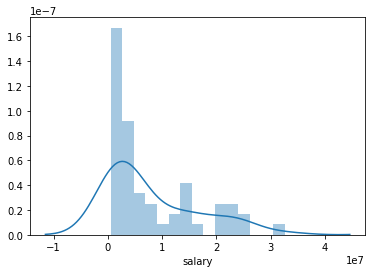

In [72]:
# plot a histogram of the all star game salaries
all_stars2015 = g[salary_and_as["year"]==2015]
sb.distplot(all_stars2015["salary"], bins=15)


While obviously this graph isn't the greatest, it still tells us a shocking fact. That most all stars are paid under the average of 4 million dollars. Let's investigate this further.

In [73]:
all_stars2015["salary"].mean()

7943380.196428572

The average being 8 million is much higher than 4 million.

In [74]:
all_stars2015.sort_values("salary",ascending=False).head(10)

,year,player_id,gp,salary
25131,2015,kershcl01,1,32571000
25124,2015,greinza01,1,25000000
25391,2015,hernafe02,1,24857000
25501,2015,fieldpr01,1,24000000
25101,2015,pujolal01,1,24000000
25246,2015,teixema01,1,23125000
25122,2015,gonzaad01,1,21857000
25006,2015,tulowtr01,1,20000000
25025,2015,priceda01,1,19750000
25432,2015,poseybu01,1,16500000


In [77]:
all_stars2015.sort_values("salary",ascending=False).tail(15)

,year,player_id,gp,salary
25017,2015,iglesjo01,1,1443750
25463,2015,archech01,1,1166667
25123,2015,grandya01,1,693000
25255,2015,degroja01,1,556875
24827,2015,machama01,1,548000
25334,2015,colege01,1,531000
24850,2015,holtbr01,1,530500
25045,2015,keuchda01,1,524500
25428,2015,panikjo01,1,522500
24780,2015,polloaj01,1,519500


# Step 4

Here we found out why the average is so high, there are a few players who are paid so much money that they raise the average to 8 million (they also probably raise the league wide average to 4 million).

Overall, it was shocking to see that so many all stars are paid such little amounts. My guess is that most of them are on rookie contracts. However, it is still weird to think how many all stars are getting paid much less than the league average. 

Also, earlier in the project we found out that even though you are paid a high salary doesn't mean they are a guarentee to make the all star game. We also came to the conclusion that ARod was overpaid.

If I were to continue this project in the future I would probably look at other years than just 2015. I would want to go back and see if this was different in the 80s or 90s. Additionally I would want to go through every years all star game and see the percentage of players who were paid less than the league wide average for that year.